# Loading Dataset and Installing Libraries

In [ ]:
!pip install python-igraph pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d stackoverflow/stacksample --unzip

Dataset URL: https://www.kaggle.com/datasets/stackoverflow/stacksample
License(s): other


# Function to recieve individual year data

In [ ]:
import pandas as pd

question = pd.read_csv('Questions.csv', encoding='ISO-8859-1')
# answer = pd.read_csv('Answers.csv', encoding='ISO-8859-1')
tags = pd.read_csv('Tags.csv', encoding='ISO-8859-1')


In [ ]:
print("Question :", question.shape)
print("Tags : ", tags.shape)

Question : (1264216, 7)
Tags :  (3750994, 2)


In [ ]:
# to get column for individual year and dates
def update_question(questions):
  questions = questions.copy()
  #Check if CreationDate not in Question.csv
  if 'CreationDate' not in questions.columns:
    print('CreationDate not in Question.csv')
    return
  questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])
  # Create new columns
  questions['year'] = questions['CreationDate'].dt.year
  questions['date'] = questions['CreationDate'].dt.date
  questions['time'] = questions['CreationDate'].dt.time
  # Drop the old column
  questions.drop(columns=['CreationDate'], inplace=True)

  return questions

In [ ]:
questions_csv = update_question(question)
questions_csv.head()

,Id,OwnerUserId,ClosedDate,Score,Title,Body,year,date,time
0,80,26.0,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,2008,2008-08-01,13:57:07
1,90,58.0,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,2008,2008-08-01,14:41:24
2,120,83.0,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,2008,2008-08-01,15:50:08
3,180,2089740.0,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,2008,2008-08-01,18:42:19
4,260,91.0,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,2008,2008-08-01,23:22:08


In [ ]:
#def combine question and tags
def combine_tags_question(questions, tags):
  questions = questions.copy()
  # Check if TagName not in Tags.csv
  if 'Tag' not in tags.columns:
    print('TagName not in Tags.csv')
    return
  tags_group = tags.groupby('Id')['Tag'].apply(list).reset_index()
  # Merge into questions DataFrame on Id
  questions = questions.merge(tags_group, on='Id', how='left')
  # Rename the 'Tag' column to 'tags' for clarity
  questions.rename(columns={'Tag': 'tags'}, inplace=True)
  return questions

In [ ]:
questions_tags_csv = combine_tags_question(questions_csv, tags)
print(questions_tags_csv.head())
print("Size of question dataset : " + str(len(questions_tags_csv)))

    Id  OwnerUserId            ClosedDate  Score  \
0   80         26.0                   NaN     26   
1   90         58.0  2012-12-26T03:45:49Z    144   
2  120         83.0                   NaN     21   
3  180    2089740.0                   NaN     53   
4  260         91.0                   NaN     49   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   

                                                Body  year        date  \
0  <p>I've written a database generation script i...  2008  2008-08-01   
1  <p>Are there any really good tutorials explain...  2008  2008-08-01   
2  <p>Has anyone got experience creating <strong>...  2008  2008-08-01   
3  <p>This is something I've pseudo-solved many t...  

In [ ]:
def get_individual_year(questions, year):
  questions = questions.copy()
  #check is year column present of not in dataset
  if 'year' not in questions.columns:
    print("Year column doesn't exist in question dataset")
  #check if this year exist or not
  if year not in questions['year'].unique():
    print("This year doesn't exist in question dataset")

  return questions[questions['year'] == year]


question_tags_2016 = get_individual_year(questions_tags_csv, 2016)
print(question_tags_2016.head())
question_tags_2015 = get_individual_year(questions_tags_csv, 2015)
question_tags_2014 = get_individual_year(questions_tags_csv, 2014)
question_tags_2013 = get_individual_year(questions_tags_csv, 2013)
question_tags_2012 = get_individual_year(questions_tags_csv, 2012)
question_tags_2011 = get_individual_year(questions_tags_csv, 2011)
question_tags_2010 = get_individual_year(questions_tags_csv, 2010)
question_tags_2009 = get_individual_year(questions_tags_csv, 2009)
question_tags_2008 = get_individual_year(questions_tags_csv, 2008)

print("Size of 2016 question dataset : " + str(len(question_tags_2016)))
print("Size of 2015 question dataset : " + str(len(question_tags_2015)))
print("Size of 2014 question dataset : " + str(len(question_tags_2014)))
print("Size of 2013 question dataset : " + str(len(question_tags_2013)))
print("Size of 2012 question dataset : " + str(len(question_tags_2012)))
print("Size of 2011 question dataset : " + str(len(question_tags_2011)))
print("Size of 2010 question dataset : " + str(len(question_tags_2010)))
print("Size of 2009 question dataset : " + str(len(question_tags_2009)))
print("Size of 2008 question dataset : " + str(len(question_tags_2008)))

               Id  OwnerUserId ClosedDate  Score  \
1053167  34552550    5684416.0        NaN      0   
1053168  34552560    3540430.0        NaN      0   
1053169  34552600    4072850.0        NaN      1   
1053170  34552610     505188.0        NaN     -1   
1053171  34552650    3524753.0        NaN      2   

                                             Title  \
1053167                      Scope between methods   
1053168        Which data structure (full HABTM ?)   
1053169    Can't style body in style.css (Node.js)   
1053170  Adding ternary operator in echo statement   
1053171    Unity 5.3 onClick with parameters issue   

                                                      Body  year        date  \
1053167  <p>Another newbie question. I am trying to und...  2016  2016-01-01   
1053168  <p>I just want to know which of this two struc...  2016  2016-01-01   
1053169  <p>I just got a basic Node.js site up and runn...  2016  2016-01-01   
1053170  <p>I'm using this echo statement 

In [ ]:
from collections import Counter


def get_tag_frequencies(df_year):
    all_tags = [tag for tag_list in df_year['tags'].dropna() for tag in tag_list]
    return Counter(all_tags)

def get_top_tags_from_df(df, top_n=10):
    all_tags = [tag for tag_list in df['tags'].dropna() for tag in tag_list]
    return Counter(all_tags).most_common(top_n)

top10_tags_2016 = get_top_tags_from_df(question_tags_2016)
top10_tags_2015 = get_top_tags_from_df(question_tags_2015)
top10_tags_2014 = get_top_tags_from_df(question_tags_2014)
top10_tags_2013 = get_top_tags_from_df(question_tags_2013)
top10_tags_2012 = get_top_tags_from_df(question_tags_2012)
top10_tags_2011 = get_top_tags_from_df(question_tags_2011)
top10_tags_2010 = get_top_tags_from_df(question_tags_2010)
top10_tags_2009 = get_top_tags_from_df(question_tags_2009)
top10_tags_2008 = get_top_tags_from_df(question_tags_2008)

print("Top 10 tags for 2016:" + str(top10_tags_2016) )
print("Top 10 tags for 2015:" + str(top10_tags_2015) )
print("Top 10 tags for 2014:" + str(top10_tags_2014) )
print("Top 10 tags for 2013:" + str(top10_tags_2013) )
print("Top 10 tags for 2012:" + str(top10_tags_2012) )
print("Top 10 tags for 2011:" + str(top10_tags_2011) )
print("Top 10 tags for 2010:" + str(top10_tags_2010) )
print("Top 10 tags for 2009:" + str(top10_tags_2009) )
print("Top 10 tags for 2008:" + str(top10_tags_2008) )

print(len(get_tag_frequencies(question_tags_2008)))
print(len(get_tag_frequencies(question_tags_2009)))
print(len(get_tag_frequencies(question_tags_2010)))
print(len(get_tag_frequencies(question_tags_2011)))
print(len(get_tag_frequencies(question_tags_2012)))
print(len(get_tag_frequencies(question_tags_2013)))
print(len(get_tag_frequencies(question_tags_2014)))
print(len(get_tag_frequencies(question_tags_2015)))
print(len(get_tag_frequencies(question_tags_2016)))

Top 10 tags for 2016:[('javascript', 24607), ('java', 18852), ('android', 16082), ('php', 15232), ('python', 14115), ('c#', 13750), ('html', 10678), ('jquery', 10505), ('ios', 8224), ('css', 7197)]
Top 10 tags for 2015:[('javascript', 26419), ('java', 22545), ('php', 17370), ('android', 17124), ('c#', 16220), ('python', 14011), ('jquery', 13278), ('html', 12351), ('ios', 10286), ('css', 8714)]
Top 10 tags for 2014:[('javascript', 24108), ('java', 21880), ('php', 18248), ('android', 16742), ('c#', 16558), ('jquery', 14640), ('html', 12192), ('python', 11708), ('ios', 9207), ('css', 8845)]
Top 10 tags for 2013:[('javascript', 19662), ('java', 19276), ('php', 17051), ('c#', 16608), ('android', 15624), ('jquery', 14717), ('html', 9793), ('python', 9729), ('ios', 8287), ('c++', 8264)]
Top 10 tags for 2012:[('java', 14566), ('c#', 13847), ('javascript', 13787), ('php', 13619), ('android', 13331), ('jquery', 11571), ('ios', 7250), ('html', 6529), ('python', 6462), ('c++', 6392)]
Top 10 tags f

# For 2016

In [ ]:
def normalize_frequencies(tag_freq_dict, new_min=1, new_max=10):
    old_values = list(tag_freq_dict.values())
    old_min = min(old_values)
    old_max = max(old_values)

    def normalize(val):
        if old_max == old_min:
            return new_min  # Avoid division by zero
        return int(((val - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min)

    return {tag: normalize(freq) for tag, freq in tag_freq_dict.items()}



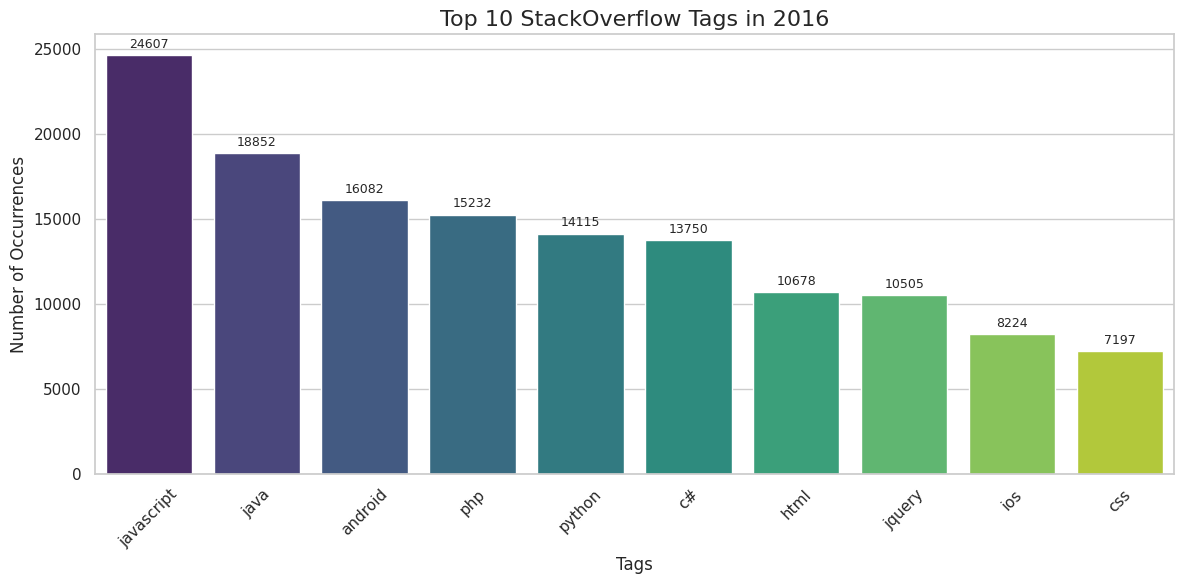

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_top_tags(top_tags, year=None):
    """
    Plots a bar chart of the top tags without Seaborn future warnings.
    """
    # Convert to DataFrame
    df = pd.DataFrame(top_tags, columns=['Tag', 'Count'])

    # Plot style
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Fix the palette warning: set hue and remove legend
    ax = sns.barplot(data=df, x="Tag", y="Count", hue="Tag", palette="viridis", legend=False)

    ax.set_title(f"Top 10 StackOverflow Tags in {year}" if year else "Top 10 Tags", fontsize=16)
    ax.set_ylabel("Number of Occurrences")
    ax.set_xlabel("Tags")

    plt.xticks(rotation=45)

    # Add value labels on top of bars
    for i, row in df.iterrows():
        ax.text(i, row['Count'] + max(df['Count']) * 0.01, row['Count'],
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()



plot_top_tags(top10_tags_2016, 2016)




In [ ]:
#plot a graph where nodes are tags and edegese exist between them if they have 50 question with common and if both tags occur in 100 questino then edge weight two so the edge weight will be multiple of 50

In [ ]:
n=20

def get_top_n_tags_nodes(tag_freq, n):
    return [tag for tag, _ in tag_freq.most_common(n)]

# print(top_tags_nodes)


In [ ]:
from collections import defaultdict
from itertools import combinations


def get_tag_edges(df_year, allowed_tags, min_common=1):
    co_occurrence = defaultdict(int)

    for tag_list in df_year['tags'].dropna():
        # Filter tags to only include valid strings from allowed_tags
        filtered = [tag for tag in tag_list if isinstance(tag, str) and tag in allowed_tags]
        for tag1, tag2 in combinations(sorted(set(filtered)), 2):
            co_occurrence[(tag1, tag2)] += 1

    # Normalize weights by min_common
    edges = [
        (tag1, tag2, round(count / min_common, 2))
        for (tag1, tag2), count in co_occurrence.items()
        if count >= min_common
    ]

    return edges



In [ ]:
import igraph as ig
from igraph import Graph
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import numpy as np

In [ ]:
def get_percentile_cutoff(df_year, allowed_tags, percentile=90):
    from collections import defaultdict
    from itertools import combinations

    co_occurrence = defaultdict(int)
    for tag_list in df_year['tags'].dropna():
        if not isinstance(tag_list, list):
            continue  # skip if tag_list isn't a list
        filtered = [tag for tag in tag_list if isinstance(tag, str) and tag in allowed_tags]
        for tag1, tag2 in combinations(sorted(set(filtered)), 2):
            co_occurrence[(tag1, tag2)] += 1

    values = list(co_occurrence.values())
    cutoff = int(np.percentile(values, percentile)) if values else 0
    return cutoff# Used for plotting different
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# cutoff = get_percentile_cutoff(question_tags_2016, top_tags_nodes, percentile=90)
# print(f"Suggested min_common (90th percentile): {cutoff}")

# Graph for all years


🧠 What You Calculated: Degree Assortativity
Degree assortativity tells us how similar the connected tags are in terms of popularity.

A negative value means that popular tags are usually connected to less popular (niche) tags.

A positive value (which we don't have here) would mean popular tags connect mostly to other popular tags.

📉 What You Found
From 2008 to 2016, all your values were negative, like this:


Year	Total Tags	Assortativity
2008	3,229	-0.2882
2011	15,018	-0.3033 (most negative)
2016	23,746	-0.2617
This means:

The network was always mixing popular and niche tags.

Over time, this mixing became slightly less extreme (from -0.30 to -0.26), meaning the network became a bit more balanced.

🕰️ What Changed Over the Years?
1. 2008–2010: Microsoft World
Tags like .net, c#, and asp.net were very common.

These central tags connected to many smaller ones.

The network was small and tightly focused on Windows-based tech.

2. 2011–2013: Web & Mobile Boom
New tags like javascript, jquery, android, and ios became popular.

Many smaller tags started connecting to these new big ones.

This is when the assortativity was most negative (lots of big-small tag connections).

3. 2014–2016: More Balance
Technologies like javascript, python, java, and html dominated.

These are used in many different fields (web, data, mobile), so they naturally connect with lots of smaller, topic-specific tags.

The tag network grew bigger and more balanced, but still had that “big tags connect to small ones” pattern.

🧩 What Does It Mean?
Popular tags act like hubs, connecting to lots of smaller, specific tags.

The tech world is becoming more diverse: not just Microsoft or Java, but also web, mobile, and data science.

Even as new tags were added and usage changed, the overall pattern stayed the same: big tags are connected to many small ones.

🎯 Final Takeaway (Super Simple)
Your data shows that over the years, popular programming topics (like JavaScript, Java, Python) were always at the center, connecting with many small, specialized topics.

This tells us:

"The developer world became more connected and diverse, but the big tools always stayed important by linking to lots of smaller tools."

In [ ]:
def fun():
  for year in range(2008, 2017):
    g= Graph()
    i = get_individual_year(questions_tags_csv, year)
    verticesize = len(get_tag_frequencies(i))
    print(verticesize)
    vertices = get_top_n_tags_nodes(get_tag_frequencies(i), verticesize)
    # print(vertices)
    g.add_vertices(vertices)
    cutoff = get_percentile_cutoff(i, vertices, percentile=90)
    # print(cutoff)
    edges =get_tag_edges(i, vertices, cutoff)
    # Filter valid edges (nodes must exist in graph)
    valid_edges = [(src, dst, w) for src, dst, w in edges if src in vertices and dst in vertices]
    g.add_edges([(src, dst) for src, dst, _ in valid_edges])
    g.es["weight"] = [w for _, _, w in valid_edges]

    assortativity = g.assortativity_degree(directed=False)
    print(f"{year}: {assortativity:.4f}")

fun()

3229
2008: -0.2882
8073
2009: -0.2932
11736
2010: -0.2924
15018
2011: -0.3033
17723
2012: -0.2845
20083
2013: -0.2712
21488
2014: -0.2701
23397
2015: -0.2641
23746
2016: -0.2617


In [ ]:
def fun():
  for year in range(2008, 2017):
    g= Graph()
    i = get_individual_year(questions_tags_csv, year)
    vertices = get_top_n_tags_nodes(get_tag_frequencies(i), 200)
    # print(vertices)
    g.add_vertices(vertices)
    cutoff = get_percentile_cutoff(i, vertices, percentile=90)
    print(cutoff)
    edges =get_tag_edges(i, vertices, cutoff)
    # Filter valid edges (nodes must exist in graph)
    valid_edges = [(src, dst, w) for src, dst, w in edges if src in vertices and dst in vertices]
    g.add_edges([(src, dst) for src, dst, _ in valid_edges])
    g.es["weight"] = [w for _, _, w in valid_edges]

    print(g.summary())

fun()

5
IGRAPH UNW- 200 282 -- 
+ attr: name (v), weight (e)
12
IGRAPH UNW- 200 595 -- 
+ attr: name (v), weight (e)
18
IGRAPH UNW- 200 721 -- 
+ attr: name (v), weight (e)
24
IGRAPH UNW- 200 872 -- 
+ attr: name (v), weight (e)
30
IGRAPH UNW- 200 888 -- 
+ attr: name (v), weight (e)
35
IGRAPH UNW- 200 919 -- 
+ attr: name (v), weight (e)
39
IGRAPH UNW- 200 939 -- 
+ attr: name (v), weight (e)
39
IGRAPH UNW- 200 947 -- 
+ attr: name (v), weight (e)
36
IGRAPH UNW- 200 945 -- 
+ attr: name (v), weight (e)


In [ ]:
def fun():
  for year in range(2008, 2017):
    g= Graph()
    i = get_individual_year(questions_tags_csv, year)
    top_tags_nodes = get_top_n_tags_nodes(get_tag_frequencies(i), 5)
    print(top_tags_nodes)

fun()

['c#', '.net', 'java', 'asp.net', 'c++']
['c#', 'java', '.net', 'php', 'asp.net']
['c#', 'java', 'php', 'javascript', 'jquery']
['c#', 'java', 'php', 'javascript', 'android']
['java', 'c#', 'javascript', 'php', 'android']
['javascript', 'java', 'php', 'c#', 'android']
['javascript', 'java', 'php', 'android', 'c#']
['javascript', 'java', 'php', 'android', 'c#']
['javascript', 'java', 'android', 'php', 'python']


# Centrality

In [ ]:
def fun():
  for year in range(2008, 2017):
    g= Graph()
    i = get_individual_year(questions_tags_csv, year)

    # print((get_tag_frequencies(i).size))
    vertices = get_top_n_tags_nodes(get_tag_frequencies(i), 2000)
    # print(vertices)
    g.add_vertices(vertices)
    cutoff = get_percentile_cutoff(i, vertices, percentile=90)
    print(cutoff)
    edges =get_tag_edges(i, vertices, cutoff)
    # Filter valid edges (nodes must exist in graph)
    valid_edges = [(src, dst, w) for src, dst, w in edges if src in vertices and dst in vertices]
    g.add_edges([(src, dst) for src, dst, _ in valid_edges])
    g.es["weight"] = [w for _, _, w in valid_edges]

    print("\n📊 Centrality Measures (Maximum Values Only):")

    # for year, g in high_freq_graphs.items():
    print(f"\n🗓️ Year: {year}")

    try:
        degree = g.degree()
        betweenness = g.betweenness(weights=g.es["weight"])
        closeness = g.closeness()
        eigenvector = g.eigenvector_centrality(weights=g.es["weight"])
    except Exception as e:
        print(f"   ⚠️ Error computing centralities for {year}: {e}")
        continue

    centrality_metrics = {
        "Degree Centrality": degree,
        "Betweenness Centrality": betweenness,
        "Closeness Centrality": closeness,
        "Eigenvector Centrality": eigenvector
    }

    for metric_name, values in centrality_metrics.items():
        if all(v == 0 or v is None for v in values):
            print(f"   ⚠️ {metric_name}: All values are zero or not computable.")
            continue

        max_val = max(values)
        top_indices = [i for i, val in enumerate(values) if val == max_val]
        top_tags = [g.vs[i]['name'] for i in top_indices]

        print(f"   ⭐ {metric_name}: {max_val:.6f} → Tag(s): {', '.join(top_tags)}")

fun()

2

📊 Centrality Measures (Maximum Values Only):

🗓️ Year: 2008
   ⭐ Degree Centrality: 199.000000 → Tag(s): c#
   ⭐ Betweenness Centrality: 70582.692635 → Tag(s): .net
   ⭐ Closeness Centrality: 1.000000 → Tag(s): coldfusion, ipc, rpc, openoffice.org, oledb, rdf, lucene, lucene.net, decimal, ado, requirements, kernel, palm-os, semantic-web, owl, ontology, linear-algebra, gpl, methodology, parameter-passing, pass-by-reference, osdev, garnet-os, cfc, matrix, matrix-inverse, spreadsheet, double, artificial-intelligence, neural-network, lgpl
   ⭐ Eigenvector Centrality: 1.000000 → Tag(s): c#
4

📊 Centrality Measures (Maximum Values Only):

🗓️ Year: 2009
   ⭐ Degree Centrality: 454.000000 → Tag(s): c#
   ⭐ Betweenness Centrality: 172216.905876 → Tag(s): c#
   ⭐ Closeness Centrality: 1.000000 → Tag(s): project-management, latex, agile, development-environment, scheme, dynamics-crm, scrum, virtualization, neural-network, signal-processing, mapreduce, autoconf, fft, hadoop, squeak, racket, aut

# Usage Trends

               Id             Tag              CreationDate  Year
0              80            flex 2008-08-01 13:57:07+00:00  2008
1              80  actionscript-3 2008-08-01 13:57:07+00:00  2008
2              80             air 2008-08-01 13:57:07+00:00  2008
3              90             svn 2008-08-01 14:41:24+00:00  2008
4              90     tortoisesvn 2008-08-01 14:41:24+00:00  2008
...           ...             ...                       ...   ...
3750989  40143360      javascript 2016-10-19 23:55:24+00:00  2016
3750990  40143360          vue.js 2016-10-19 23:55:24+00:00  2016
3750991  40143380             npm 2016-10-19 23:57:31+00:00  2016
3750992  40143380           mocha 2016-10-19 23:57:31+00:00  2016
3750993  40143380           babel 2016-10-19 23:57:31+00:00  2016

[3750994 rows x 4 columns]
2008: ['c#', '.net', 'java', 'asp.net', 'c++']
2009: ['c#', 'java', '.net', 'php', 'asp.net']
2010: ['c#', 'java', 'php', 'javascript', 'jquery']
2011: ['c#', 'java', 'php', 'javas

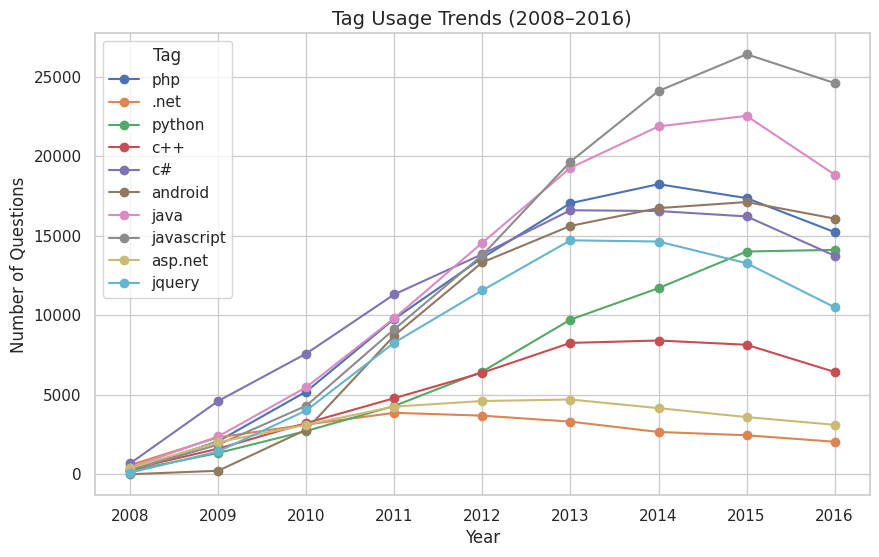

In [ ]:
# Ensure CreationDate is datetime
question['CreationDate'] = pd.to_datetime(question['CreationDate'], errors='coerce')

# Join Tags.csv with question timestamps
tag_time_df = tags.merge(question[['Id', 'CreationDate']], on='Id')
tag_time_df['Year'] = tag_time_df['CreationDate'].dt.year

# Filter for years of interest
tag_time_df = tag_time_df[tag_time_df['Year'].between(2008, 2016)]
print(tag_time_df)
def get_union_top_tags():
    union_tags = set()

    for year in range(2008, 2017):
        i = get_individual_year(questions_tags_csv, year)
        top_tags_nodes = get_top_n_tags_nodes(get_tag_frequencies(i), 5)
        print(f"{year}: {top_tags_nodes}")

        # Add to the union
        union_tags.update(top_tags_nodes)

    return list(union_tags)
union_top_tags = get_union_top_tags()
# Count tag usage per year
tag_year_freq = tag_time_df.groupby(['Tag', 'Year']).size().unstack(fill_value=0)

# # Optional: Filter to popular tags (appearing in all years)
popular_tags = tag_year_freq[tag_year_freq.sum(axis=1) >= 300]  # adjust threshold

# Plot
popular_tags.loc[union_top_tags].T.plot(figsize=(10, 6), marker='o')
plt.title("Tag Usage Trends (2008–2016)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Questions")
plt.grid(True)
plt.legend(title='Tag')
plt.show()

In [ ]:
def fun():
  for year in range(2008, 2017):
    g = Graph()
    i = get_individual_year(questions_tags_csv, year)
    vertices = get_top_n_tags_nodes(get_tag_frequencies(i), len(get_tag_frequencies(i)))
    # print(vertices)
    g.add_vertices(vertices)
    cutoff = get_percentile_cutoff(i, vertices, percentile=90)
    print("\n", cutoff)
    edges = get_tag_edges(i, vertices, cutoff)
    # Filter valid edges (nodes must exist in graph)
    valid_edges = [(src, dst, w) for src, dst, w in edges if src in vertices and dst in vertices]
    g.add_edges([(src, dst) for src, dst, _ in valid_edges])
    g.es["weight"] = [w for _, _, w in valid_edges]

    # Betweenness Centrality
    centrality = g.betweenness(weights="weight")
    tag_centrality = list(zip(g.vs["name"], centrality))
    tag_centrality.sort(key=lambda x: x[1], reverse=True)
    print(f"Top 10 Tags by Betweenness Centrality for {year} :")
    for tag, score in tag_centrality[:10]:
        print(f"{tag}: {score:.5f}")

    # Closeness Centrality
    closeness = g.closeness(weights="weight", normalized=True)
    tag_closeness = list(zip(g.vs["name"], closeness))
    tag_closeness.sort(key=lambda x: x[1], reverse=True)
    print(f"\nTop 10 Tags by Closeness Centrality for {year} :")
    for tag, score in tag_closeness[:10]:
        print(f"{tag}: {score:.5f}")

    # Eigenvector Centrality
    eigenvector = g.eigenvector_centrality(weights="weight")
    tag_eigenvector = list(zip(g.vs["name"], eigenvector))
    tag_eigenvector.sort(key=lambda x: x[1], reverse=True)
    print(f"\nTop 10 Tags by Eigenvector Centrality for {year} :")
    for tag, score in tag_eigenvector[:10]:
        print(f"{tag}: {score:.5f}")
fun()


 2
Top 10 Tags by Betweenness Centrality for 2008 :
.net: 70582.69264
java: 63741.25879
c#: 55181.95814
php: 47015.01256
c++: 39006.60323
javascript: 33465.90623
asp.net: 31672.14416
windows: 24989.57849
python: 24949.10323
sql: 18442.74290

Top 10 Tags by Closeness Centrality for 2008 :
.net: 0.37083
php: 0.36980
java: 0.35205
c#: 0.35155
database: 0.34274
javascript: 0.34038
windows: 0.33764
parsing: 0.33652
python: 0.33515
security: 0.33469

Top 10 Tags by Eigenvector Centrality for 2008 :
c#: 1.00000
.net: 0.95430
asp.net: 0.46785
winforms: 0.25160
visual-studio: 0.20852
vb.net: 0.18092
sql: 0.16219
sql-server: 0.15176
linq: 0.14323
javascript: 0.12193

 3
Top 10 Tags by Betweenness Centrality for 2009 :
c#: 343637.84947
java: 290209.25885
c++: 188948.27856
.net: 176653.79076
python: 170153.33189
php: 161180.77414
iphone: 154251.10169
asp.net: 149230.37932
javascript: 119745.98790
jquery: 99572.69434

Top 10 Tags by Closeness Centrality for 2009 :
scala: 0.85837
latex: 0.66667
c#:

# Community Detection


In [ ]:
import igraph
import matplotlib.pyplot as plt

def plot_communities(g, layout_type="kk", title="Louvain Community Detection"):
    if g is None or g.vcount() == 0 or g.ecount() == 0:
        print("Invalid or empty graph.")
        return

    # Louvain method for community detection
    communities = g.community_multilevel(weights=g.es['weight'])

    # Assign each vertex its community ID
    g.vs['community'] = communities.membership

    # Color each community differently
    num_communities = len(set(communities.membership))
    palette = igraph.drawing.colors.ClusterColoringPalette(num_communities)
    g.vs['color'] = [palette[c] for c in communities.membership]

    # Compute layout
    layout = g.layout(layout_type)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    igraph.plot(
        g,
        target=ax,
        layout=layout,
        vertex_size=10,
        vertex_color=g.vs['color'],
        vertex_label=None,
        edge_color="lightgray",
        edge_width=1,
        bbox=(1000, 1000),
        margin=20
    )
    plt.title(f"{title} — {num_communities} Communities")
    plt.show()

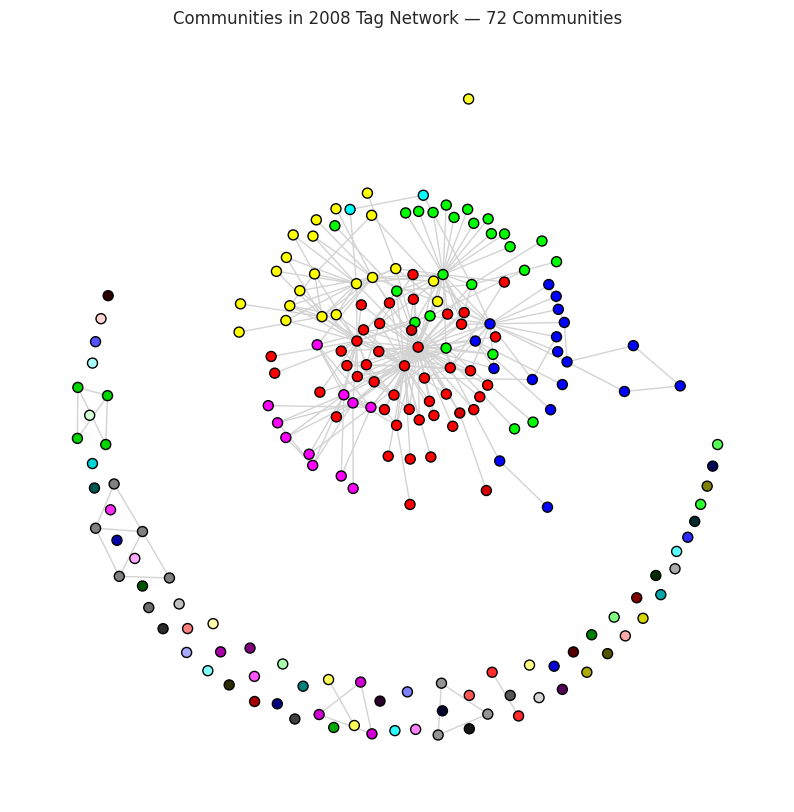

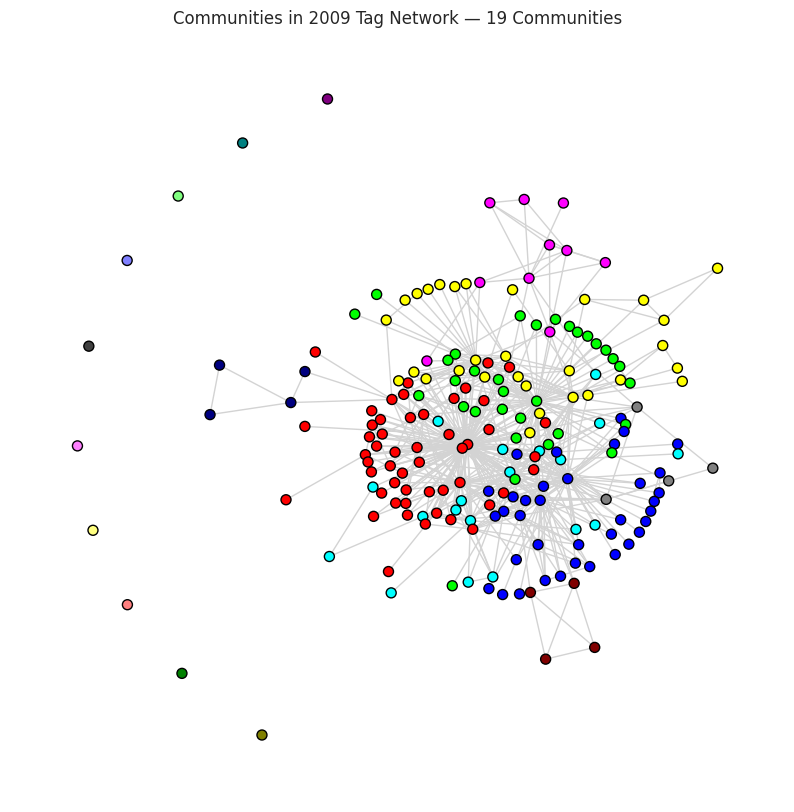

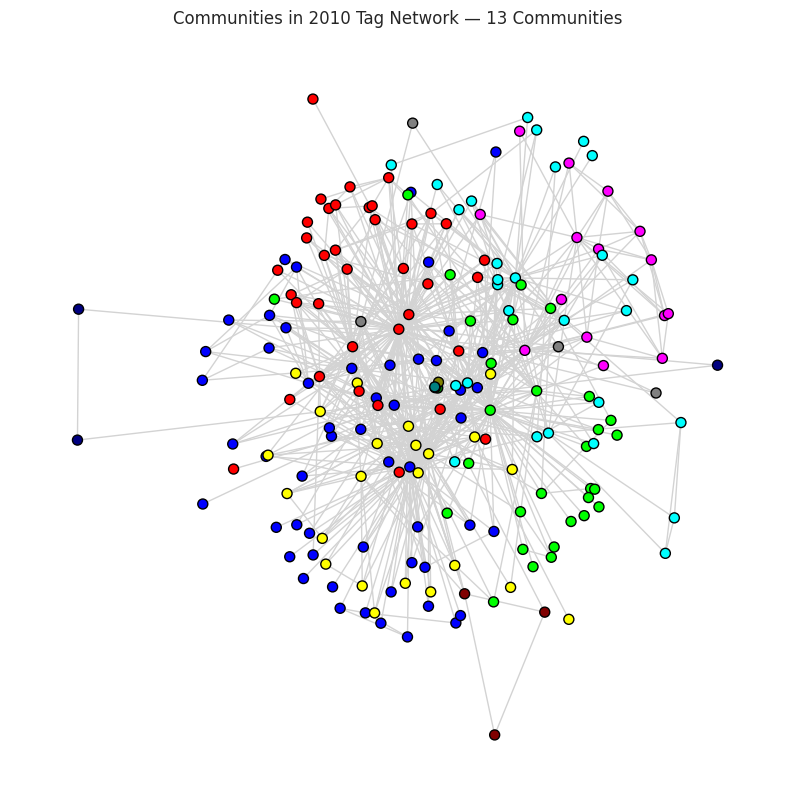

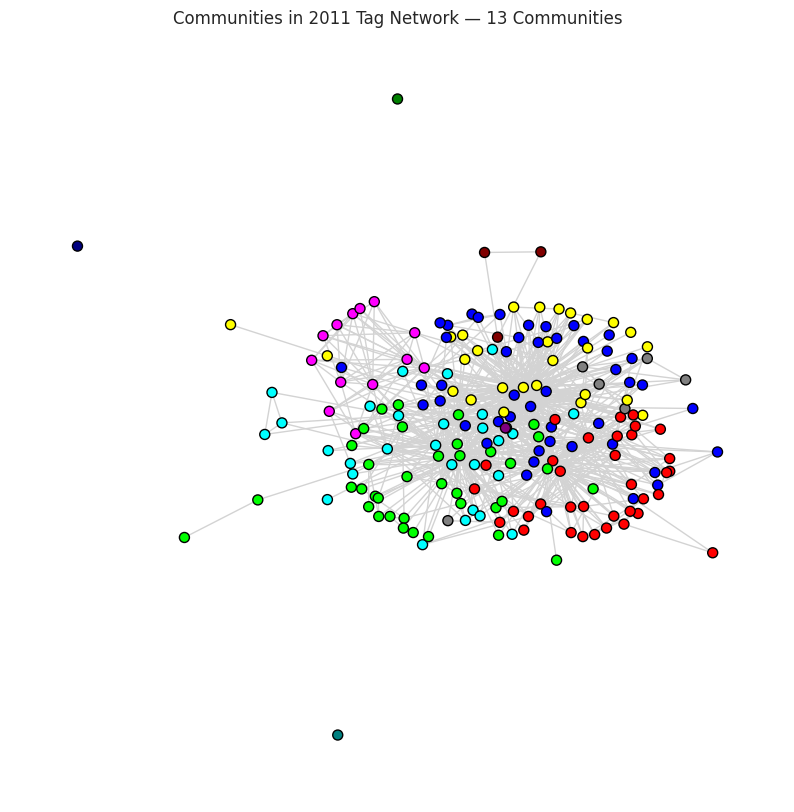

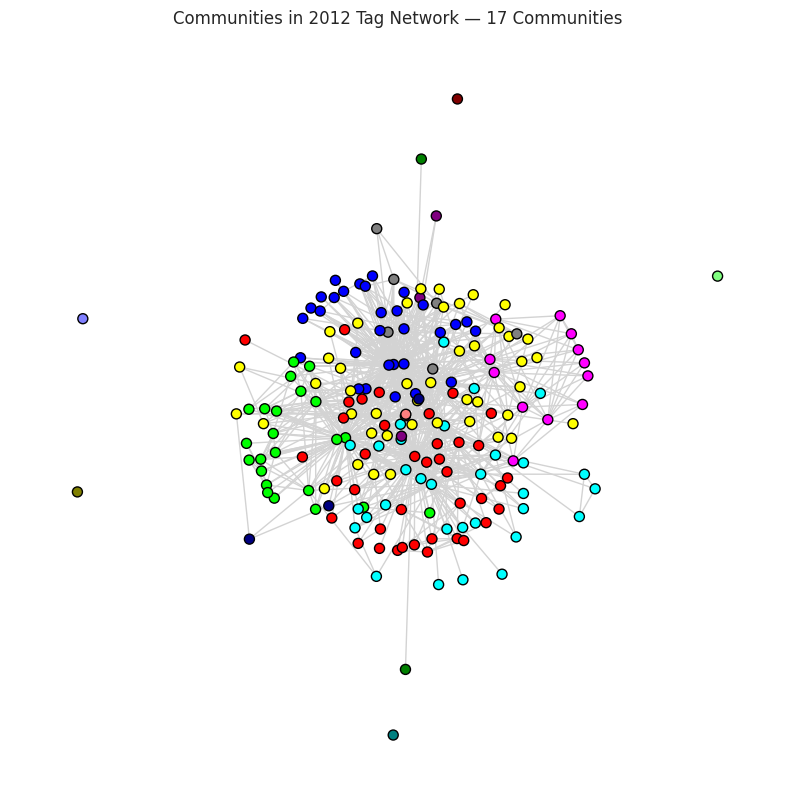

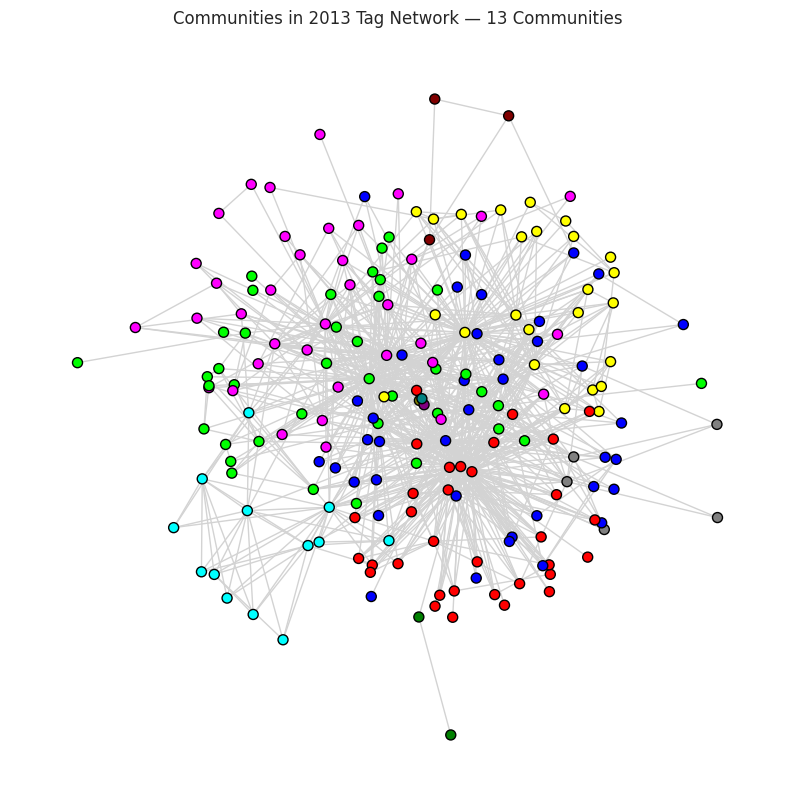

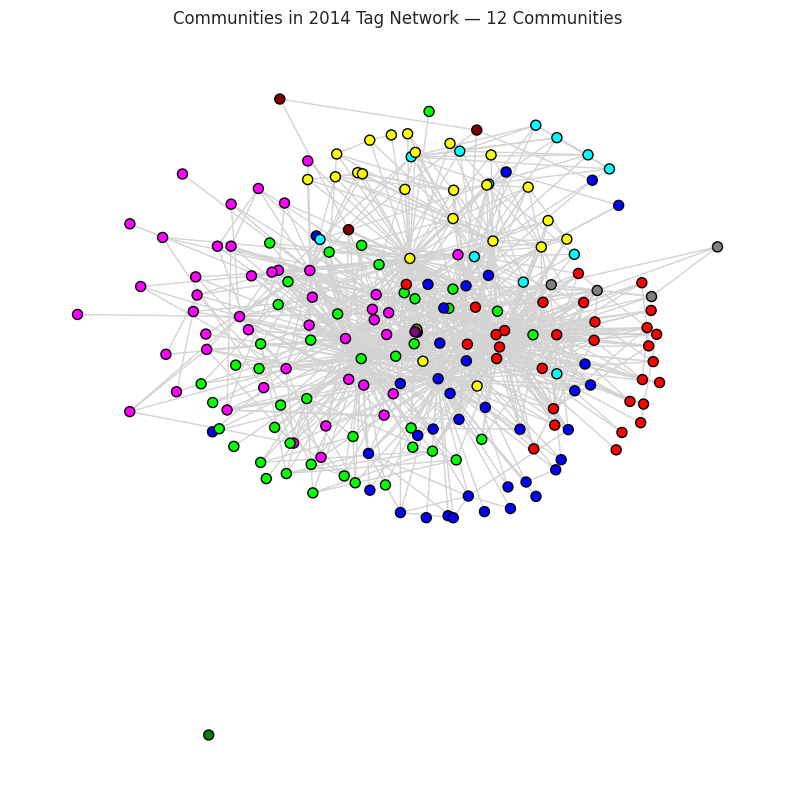

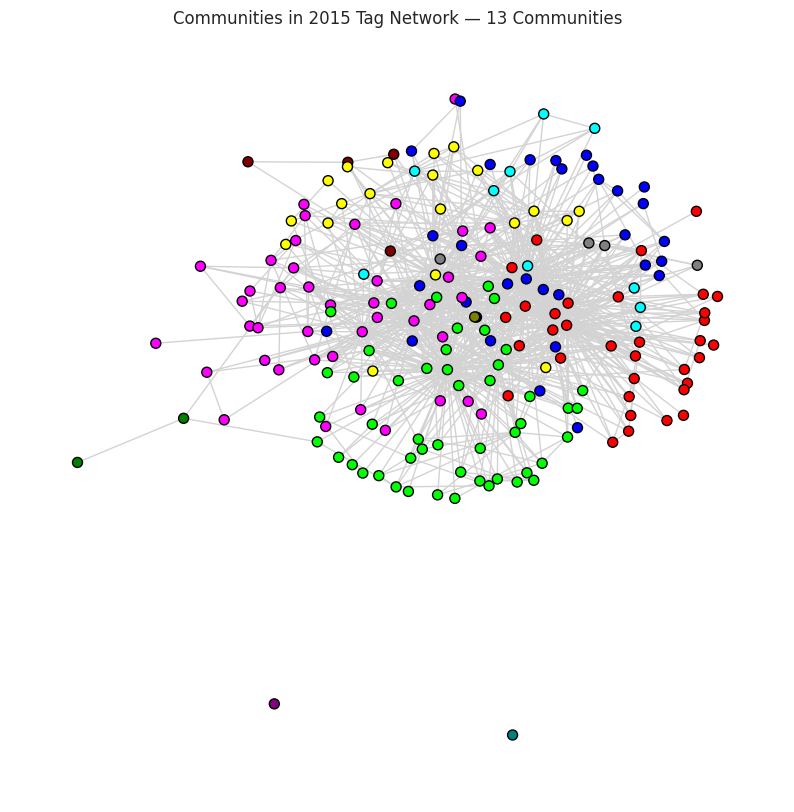

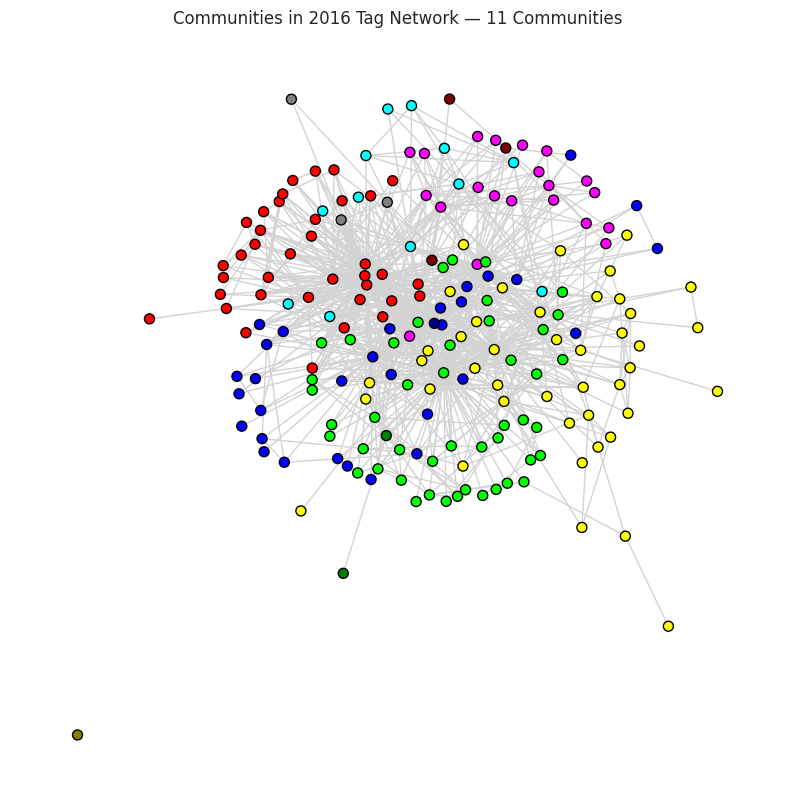

In [ ]:
def fun():
  for year in range(2008, 2017):
    g= Graph()
    i = get_individual_year(questions_tags_csv, year)
    tag_frequencies = get_tag_frequencies(i)
    # print(len(tag_frequencies))
    vertices = get_top_n_tags_nodes(tag_frequencies,200)
    # print(vertices)
    g.add_vertices(vertices)
    cutoff = get_percentile_cutoff(i, vertices, percentile=90)
    # print(cutoff)
    edges =get_tag_edges(i, vertices, cutoff)
    # Filter valid edges (nodes must exist in graph)
    valid_edges = [(src, dst, w) for src, dst, w in edges if src in vertices and dst in vertices]
    g.add_edges([(src, dst) for src, dst, _ in valid_edges])
    g.es["weight"] = [w for _, _, w in valid_edges]
    plot_communities(g, title="Communities in " + str(year) +  " Tag Network")
    # print(g.summary())

fun()

In [ ]:
from collections import defaultdict
import igraph

def get_communities_and_tags(g, verbose=False):
    """
    Perform Louvain community detection on the graph `g` and return:
    - the detected communities (igraph.clustering.VertexClustering)
    - a dict mapping community_id -> list of tag names (vertex 'name' attributes)

    Parameters:
        g (igraph.Graph): The input graph with 'name' on vertices and 'weight' on edges.
        verbose (bool): If True, prints community breakdown.

    Returns:
        communities (VertexClustering), community_tags (dict[int, list[str]])
    """
    if g is None or g.vcount() == 0 or g.ecount() == 0:
        raise ValueError("Invalid or empty graph provided.")

    # Detect Louvain communities
    communities = g.community_multilevel(weights=g.es['weight'])

    # Assign community membership to each vertex
    g.vs['community'] = communities.membership

    # Group tags by community
    community_tags = defaultdict(list)
    for vertex in g.vs:
        community_id = vertex['community']
        tag_name = vertex['name']
        community_tags[community_id].append(tag_name)

    # Optional: print breakdown
    if verbose:
        print(f"\n🧠 Detected {len(community_tags)} communities:")
        for comm_id, tags in sorted(community_tags.items()):
            print(f"\nCommunity {comm_id} ({len(tags)} tags):")
            print(", ".join(sorted(tags)))

    return communities, community_tags

In [ ]:
def fun():
  for year in range(2008, 2017):
    g= Graph()
    i = get_individual_year(questions_tags_csv, year)
    vertices = get_top_n_tags_nodes(get_tag_frequencies(i), 200)
    # print(vertices)
    g.add_vertices(vertices)
    cutoff = get_percentile_cutoff(i, vertices, percentile=90)
    print(cutoff)
    edges =get_tag_edges(i, vertices, cutoff)
    # Filter valid edges (nodes must exist in graph)
    valid_edges = [(src, dst, w) for src, dst, w in edges if src in vertices and dst in vertices]
    g.add_edges([(src, dst) for src, dst, _ in valid_edges])
    g.es["weight"] = [w for _, _, w in valid_edges]

    # print(g.summary())
    communities, community_tags = get_communities_and_tags(g, verbose=True)

fun()

5

🧠 Detected 73 communities:

Community 0 (44 tags):
.net, .net-2.0, .net-3.5, active-directory, ado.net, asp.net, asp.net-ajax, asp.net-mvc, c#, coding-style, collections, compact-framework, data-binding, datetime, debugging, deployment, design-patterns, email, entity-framework, events, exception, frameworks, generics, iis, linq, linq-to-sql, localization, multithreading, nhibernate, reflection, serialization, session, silverlight, user-controls, user-interface, vb.net, visual-studio, visual-studio-2008, wcf, web-applications, web-services, windows-services, winforms, wpf

Community 1 (25 tags):
ant, date, django, eclipse, encryption, file, hibernate, ide, java, jdbc, jsp, networking, optimization, performance, python, security, sockets, spring, swing, tdd, testing, tomcat, unit-testing, xml, xslt

Community 2 (16 tags):
bash, batch-file, c, c++, gcc, linux, mfc, qt, shell, templates, unix, visual-c++, visual-studio-2005, winapi, windows, windows-vista

Community 3 (19 tags):
ajax, a

In [ ]:
from igraph import Graph

def fun():
    yearly_communities = {}

    for year in range(2008, 2017):
        g = Graph()
        i = get_individual_year(questions_tags_csv, year)
        vertices = get_top_n_tags_nodes(get_tag_frequencies(i), 200)
        g.add_vertices(vertices)

        cutoff = get_percentile_cutoff(i, vertices, percentile=90)
        print(f"{year} — Cutoff: {cutoff}")

        edges = get_tag_edges(i, vertices, cutoff)
        valid_edges = [(src, dst, w) for src, dst, w in edges if src in vertices and dst in vertices]
        g.add_edges([(src, dst) for src, dst, _ in valid_edges])
        g.es["weight"] = [w for _, _, w in valid_edges]

        communities, community_tags = get_communities_and_tags(g, verbose=True)

        # Save results
        yearly_communities[year] = {
            "graph": g,
            "communities": communities,
            "community_tags": community_tags
        }

    return yearly_communities

In [ ]:
community_data = fun()

2008 — Cutoff: 5

🧠 Detected 73 communities:

Community 0 (46 tags):
.net, .net-2.0, .net-3.5, active-directory, ado.net, asp.net, asp.net-ajax, asp.net-mvc, c#, coding-style, collections, compact-framework, data-binding, datetime, debugging, deployment, design-patterns, email, entity-framework, events, exception, frameworks, generics, ide, iis, linq, linq-to-sql, localization, multithreading, nhibernate, reflection, serialization, session, silverlight, string, user-controls, user-interface, vb.net, visual-studio, visual-studio-2008, wcf, web-applications, web-services, windows-services, winforms, wpf

Community 1 (24 tags):
ant, date, django, eclipse, encryption, file, hibernate, java, jdbc, jsp, networking, optimization, performance, python, security, sockets, spring, swing, tdd, testing, tomcat, unit-testing, xml, xslt

Community 2 (16 tags):
bash, batch-file, c, c++, gcc, linux, mfc, qt, shell, templates, unix, visual-c++, visual-studio-2005, winapi, windows, windows-vista

Communi

In [ ]:
import json

def export_community_tags(yearly_data, filename="community_tags_over_years.json"):
    exportable = {
        year: {
            str(cid): tags for cid, tags in data["community_tags"].items()
        }
        for year, data in yearly_data.items()
    }

    with open(filename, "w") as f:
        json.dump(exportable, f, indent=2)

# Usage
export_community_tags(community_data)

In [ ]:
import csv

def export_community_tags_csv(yearly_data, filename="community_tags_over_years.csv"):
    with open(filename, mode="w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Year", "Community ID", "Tag"])

        for year, data in yearly_data.items():
            for community_id, tags in data["community_tags"].items():
                for tag in tags:
                    writer.writerow([year, community_id, tag])

# Usage
export_community_tags_csv(community_data)

In [ ]:
community_data[2012]['community_tags'][0]  # tags in community 0 in year 2012
# community_data[2016]['graph'].summary()    # graph object for 2016

['java',
 'android',
 'xml',
 'eclipse',
 'multithreading',
 'swing',
 'spring',
 'hibernate',
 'sqlite',
 'android-layout',
 'cordova',
 'file',
 'api',
 'maven',
 'jsp',
 'parsing',
 'java-ee',
 'user-interface',
 'rest',
 'scala',
 'http',
 'listview',
 'jsf',
 'debugging',
 'android-intent',
 'gwt',
 'button',
 'tomcat',
 'exception',
 'spring-mvc',
 'servlets',
 'jsf-2',
 'xslt',
 'generics',
 'jpa',
 'android-activity',
 'networking',
 'layout']

In [ ]:
community_data[2012]['community_tags'][0]  # tags in community 0 in year 2012
community_data[2016]['graph'].summary()    # graph object for 2016

'IGRAPH UNW- 200 945 -- \n+ attr: community (v), name (v), weight (e)'

# anaylysis 2.0

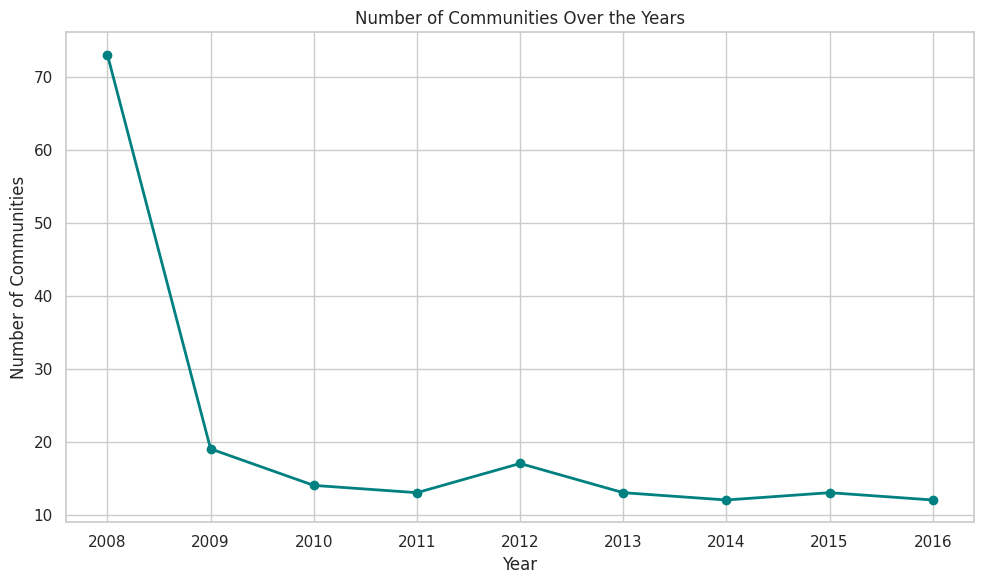

In [ ]:
import matplotlib.pyplot as plt

def plot_num_communities(yearly_communities):
    years = sorted(yearly_communities.keys())
    num_communities = [len(yearly_communities[year]["communities"]) for year in years]

    plt.figure(figsize=(10, 6))
    plt.plot(years, num_communities, marker='o', color='teal', linewidth=2)
    plt.title("Number of Communities Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Communities")
    plt.grid(True)
    plt.xticks(years)
    plt.tight_layout()
    plt.show()

# Call the function
plot_num_communities(community_data)

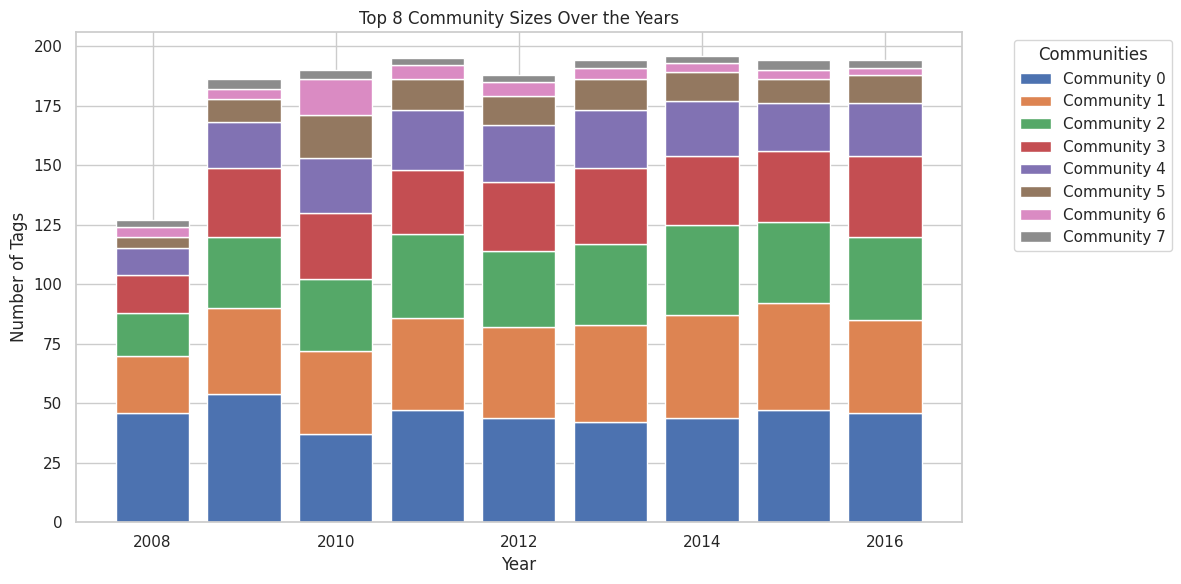

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_community_size_distribution(yearly_communities, max_comms=8):
    years = sorted(yearly_communities.keys())
    community_sizes_per_year = []

    for year in years:
        comm_sizes = [len(tags) for _, tags in sorted(yearly_communities[year]["community_tags"].items())]
        comm_sizes = sorted(comm_sizes, reverse=True)[:max_comms]
        community_sizes_per_year.append(comm_sizes + [0] * (max_comms - len(comm_sizes)))  # Padding for alignment

    # Convert to numpy array for stacking
    data = np.array(community_sizes_per_year).T

    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = np.zeros(len(years))

    for i in range(max_comms):
        ax.bar(years, data[i], bottom=bottom, label=f"Community {i}")
        bottom += data[i]

    ax.set_title(f"Top {max_comms} Community Sizes Over the Years")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Tags")
    ax.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Usage
plot_community_size_distribution(community_data, max_comms=8)

In [ ]:
import pandas as pd

def track_tags_over_time(community_data, tags_to_track):
    rows = []

    for year, data in community_data.items():
        tag_to_community = {}
        for cid, tag_list in data["community_tags"].items():
            for tag in tag_list:
                tag_to_community[tag] = (cid, len(tag_list))  # community id, size

        for tag in tags_to_track:
            if tag in tag_to_community:
                cid, size = tag_to_community[tag]
                rows.append({
                    "year": year,
                    "tag": tag,
                    "community_id": cid,
                    "community_size": size
                })
            else:
                rows.append({
                    "year": year,
                    "tag": tag,
                    "community_id": None,
                    "community_size": 0
                })

    df = pd.DataFrame(rows)
    return df

tags_to_track = ["javascript", "machine-learning", "android", "django", "tensorflow"]
df_trends = track_tags_over_time(community_data, tags_to_track)
print(df_trends.head())


   year               tag  community_id  community_size
0  2008        javascript           3.0              18
1  2008  machine-learning           NaN               0
2  2008           android           NaN               0
3  2008            django           1.0              24
4  2008        tensorflow           NaN               0


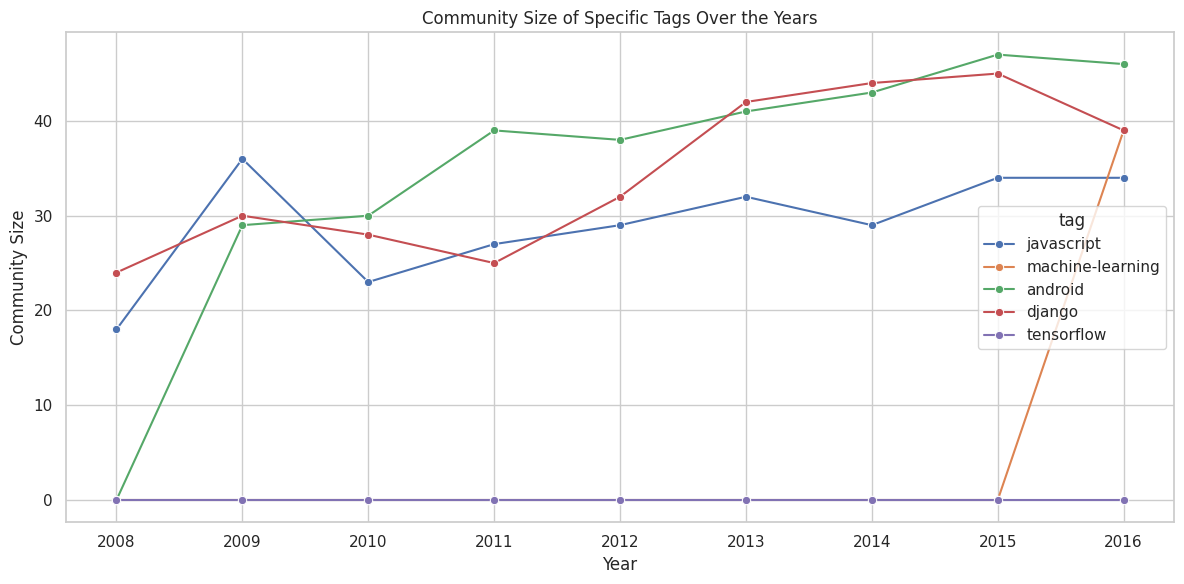

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_tag_trend(df_trends):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_trends, x="year", y="community_size", hue="tag", marker="o")
    plt.title("Community Size of Specific Tags Over the Years")
    plt.ylabel("Community Size")
    plt.xlabel("Year")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the trends
plot_tag_trend(df_trends)


In [ ]:
from collections import Counter

def get_representative_tags(community_data, tag_freq_func, top_k=3, per_year=True):
    tag_set = set()

    for year, data in community_data.items():
        tag_freq = tag_freq_func(year)  # function that gives {tag: frequency}
        community_tags = data["community_tags"]

        # Sort communities by size (descending)
        sorted_communities = sorted(community_tags.items(), key=lambda x: len(x[1]), reverse=True)

        for cid, tags in sorted_communities[:top_k]:
            # From each community, pick most frequent tag
            tag_counter = Counter({tag: tag_freq.get(tag, 0) for tag in tags})
            if tag_counter:
                top_tag = tag_counter.most_common(1)[0][0]
                tag_set.add(top_tag)

        if not per_year:
            break  # Only take from the first year if you want a global list

    return sorted(tag_set)


def get_tag_freq_for_year(year):
    df = get_individual_year(questions_tags_csv, year)
    return get_tag_frequencies(df)

# Get representative tags from top 3 communities each year
auto_tags = get_representative_tags(community_data, get_tag_freq_for_year, top_k=3)
print("Auto-selected tags to track:", auto_tags)


Auto-selected tags to track: ['c#', 'c++', 'java', 'javascript', 'php', 'python']


   year         tag  community_id  community_size
0  2008          c#             0              46
1  2008         c++             2              16
2  2008        java             1              24
3  2008  javascript             3              18
4  2008         php             3              18


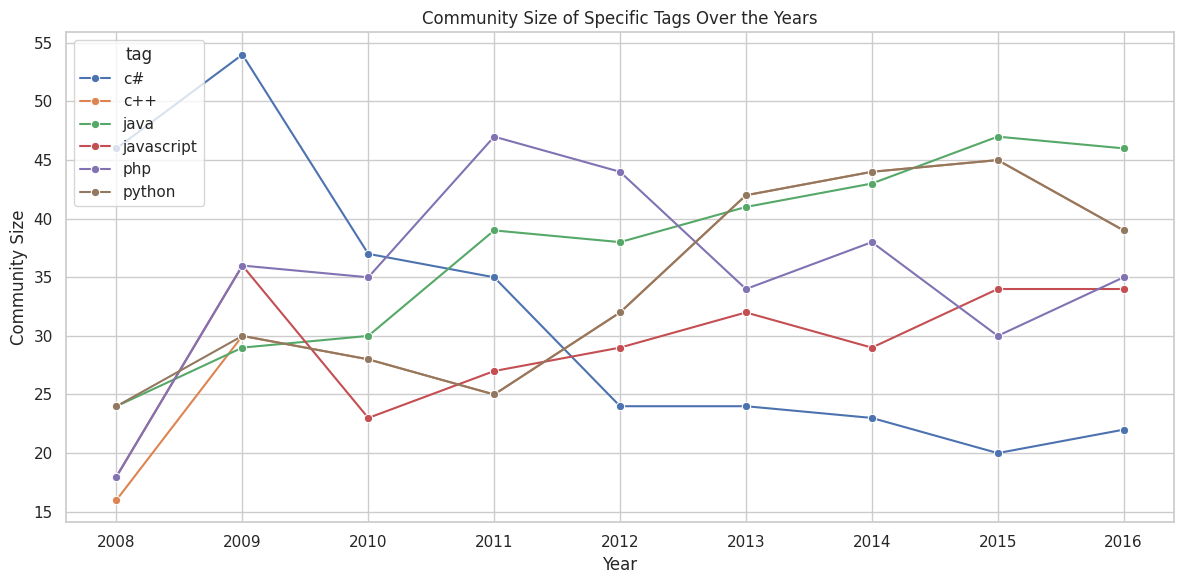

In [ ]:
# df_trends = track_tags_over_time(community_data, tags_to_track)
# print(df_trends.head())
# plot_tag_trend(df_trends)
df_trends = track_tags_over_time(community_data, auto_tags)
print(df_trends.head())
plot_tag_trend(df_trends)
# plot_tag_trend(auto_tags)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def get_tag_freq_for_year(year):
    df = get_individual_year(questions_tags_csv, year)
    return get_tag_frequencies(df)

def track_community_evolution(community_data, auto_tags):
    community_trends = defaultdict(lambda: defaultdict(int))  # {tag: {year: freq}}

    for year, data in community_data.items():
        community_tags = data["community_tags"]
        tag_freq = get_tag_freq_for_year(year)

        for target_tag in auto_tags:
            # Find the community that contains this tag
            comm_id = None
            for cid, tags in community_tags.items():
                if target_tag in tags:
                    comm_id = cid
                    break

            if comm_id is not None:
                for tag in community_tags[comm_id]:
                    community_trends[tag][year] += tag_freq.get(tag, 0)

    # Convert to DataFrame
    df = pd.DataFrame(community_trends).fillna(0).astype(int)
    df = df.sort_index()  # Sort years
    return df

In [ ]:
def plot_community_trends(df, top_n_tags=15):
    plt.figure(figsize=(14, 8))

    # Pick top N frequent tags overall
    top_tags = df.sum().sort_values(ascending=False).head(top_n_tags).index

    for tag in top_tags:
        plt.plot(df.index, df[tag], label=tag)

    plt.title("Community Evolution of Top Tags")
    plt.xlabel("Year")
    plt.ylabel("Frequency in Tag Community")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


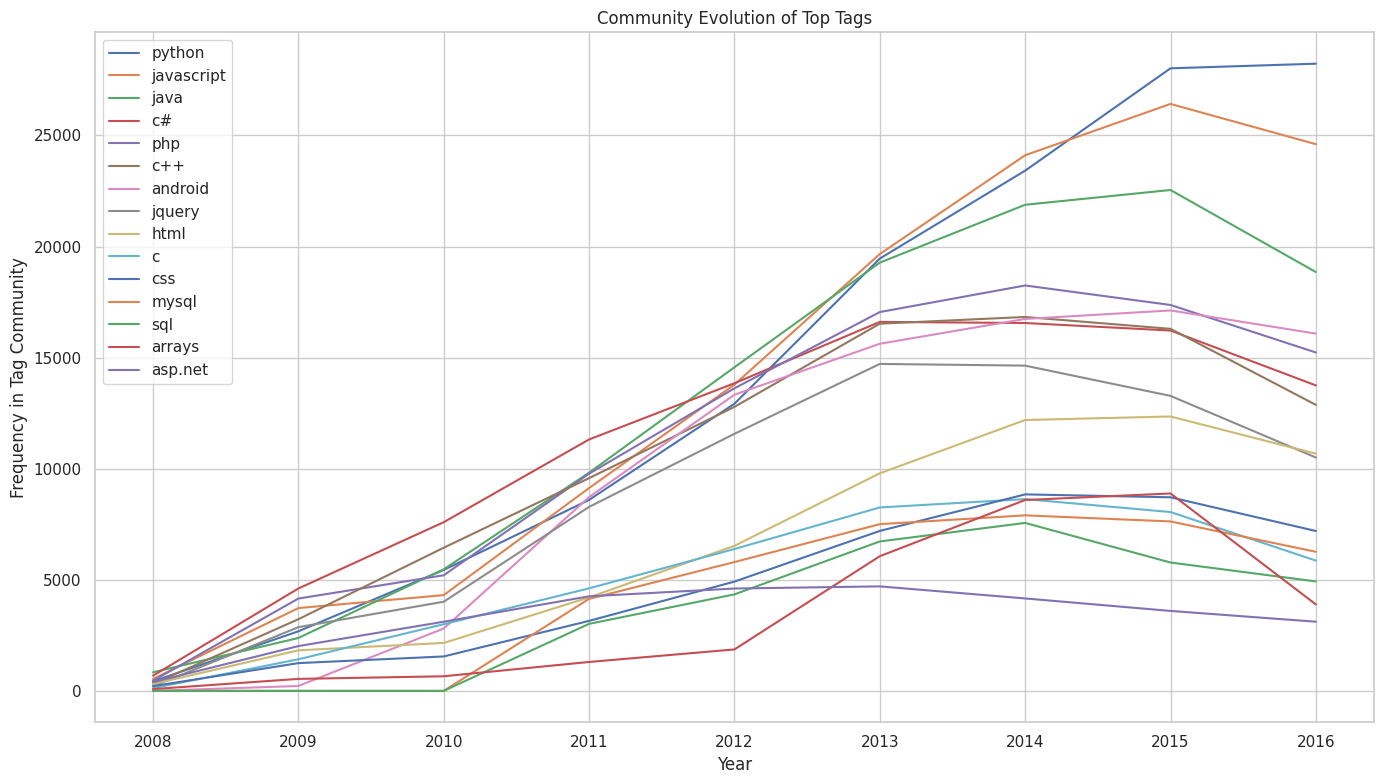

In [ ]:
df_comm_trends = track_community_evolution(community_data, auto_tags)
plot_community_trends(df_comm_trends)


In [ ]:
def track_community_group_trends(community_data, auto_tags):
    community_trends = defaultdict(lambda: defaultdict(int))  # {tag-label: {year: total community freq}}

    for year, data in community_data.items():
        community_tags = data["community_tags"]
        tag_freq = get_tag_freq_for_year(year)

        for main_tag in auto_tags:
            # Find community of the tag
            comm_id = None
            for cid, tags in community_tags.items():
                if main_tag in tags:
                    comm_id = cid
                    break

            if comm_id is not None:
                # Sum frequency of all tags in this community
                total_comm_freq = sum(tag_freq.get(tag, 0) for tag in community_tags[comm_id])
                community_trends[main_tag][year] = total_comm_freq

    # Convert to DataFrame
    df = pd.DataFrame(community_trends).fillna(0).astype(int)
    df = df.sort_index()  # Ensure years are sorted
    return df


In [ ]:
def plot_community_group_trends(df):
    plt.figure(figsize=(14, 8))

    for community_label in df.columns:
        plt.plot(df.index, df[community_label], label=f"Community: {community_label}")

    plt.title("Community-wise Tag Frequency Over Years")
    plt.xlabel("Year")
    plt.ylabel("Total Tag Frequency in Community")
    plt.legend(title="Based on Tags", fontsize=9)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


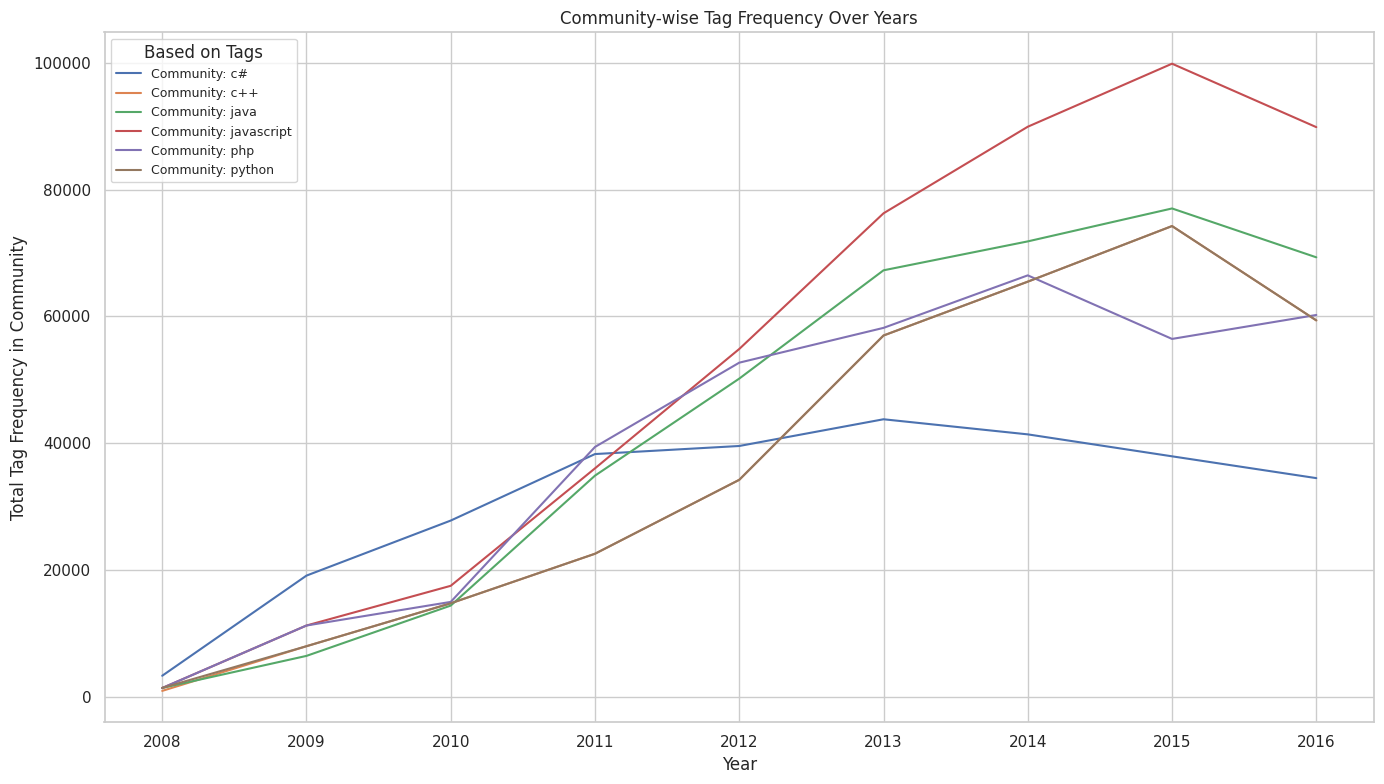

In [ ]:
# auto_tags = ["javascript", "machine-learning", "android", "django", "tensorflow"]
df_comm_groups = track_community_group_trends(community_data, auto_tags)
plot_community_group_trends(df_comm_groups)

In [ ]:
def track_community_group_trends_normalized(community_data, auto_tags):
    community_trends = defaultdict(lambda: defaultdict(float))  # {tag-label: {year: normalized freq}}

    for year, data in community_data.items():
        community_tags = data["community_tags"]
        tag_freq = get_tag_freq_for_year(year)

        total_tags_this_year = sum(tag_freq.values())

        for main_tag in auto_tags:
            comm_id = None
            for cid, tags in community_tags.items():
                if main_tag in tags:
                    comm_id = cid
                    break

            if comm_id is not None:
                community_tags_list = community_tags[comm_id]
                total_comm_freq = sum(tag_freq.get(tag, 0) for tag in community_tags_list)

                # Normalize by total tags that year
                normalized_freq = total_comm_freq / total_tags_this_year if total_tags_this_year else 0
                community_trends[main_tag][year] = round(normalized_freq, 5)

    df = pd.DataFrame(community_trends).fillna(0)
    df = df.sort_index()
    return df


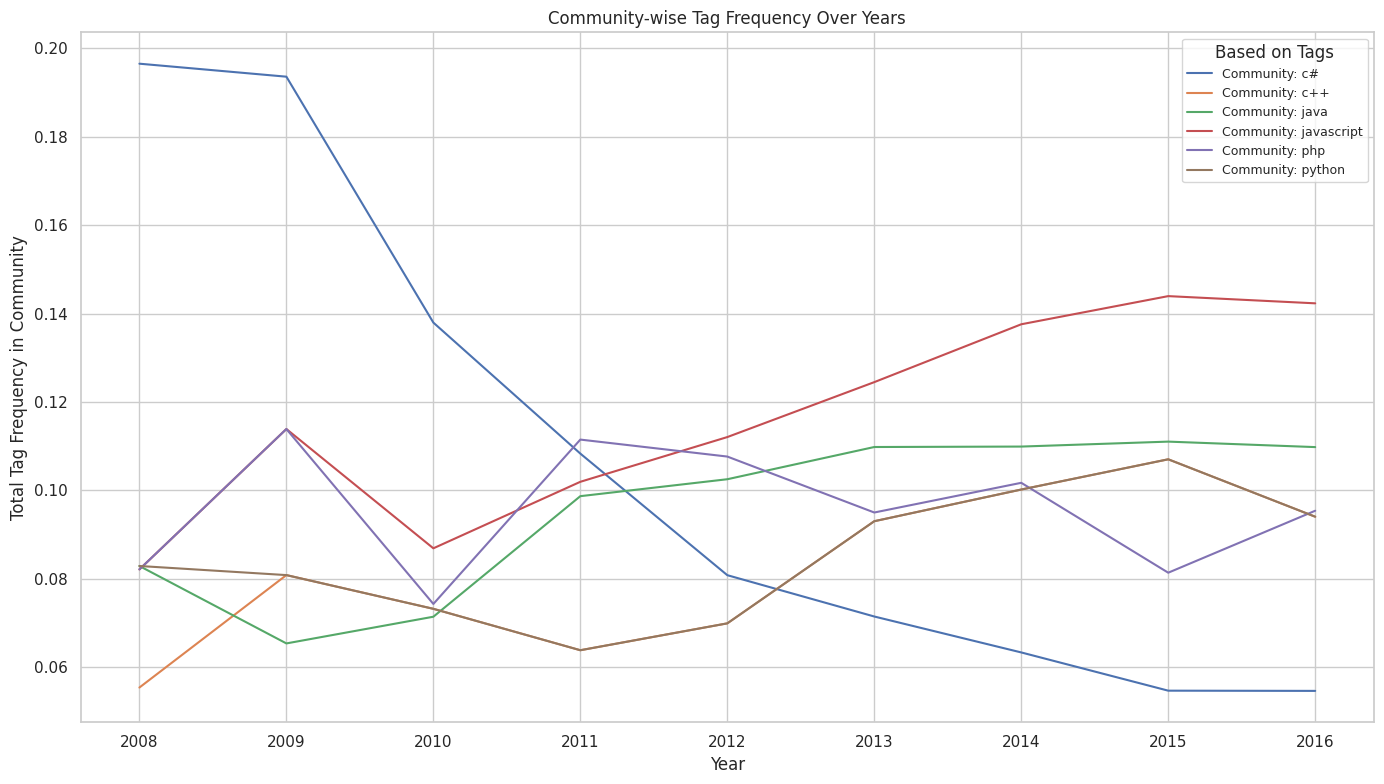

In [ ]:
df_norm = track_community_group_trends_normalized(community_data, auto_tags)
plot_community_group_trends(df_norm)

In [ ]:
community_data[2012]['community_tags'][0]  # tags in community 0 in year 2012
community_data[2016]['graph'].summary()    # graph object for 2016

'IGRAPH UNW- 200 945 -- \n+ attr: community (v), name (v), weight (e)'

In [ ]:
community_data[2008]

{'graph': <igraph.Graph at 0x7d0b2a80f950>,
 'communities': <igraph.clustering.VertexClustering at 0x7d0b2a84d950>,
 'community_tags': defaultdict(list,
             {0: ['c#',
               '.net',
               'asp.net',
               'visual-studio',
               'asp.net-mvc',
               'vb.net',
               'winforms',
               'wpf',
               'visual-studio-2008',
               'web-services',
               'multithreading',
               'linq',
               'user-interface',
               'string',
               'debugging',
               'wcf',
               'design-patterns',
               'iis',
               '.net-3.5',
               'exception',
               'deployment',
               'web-applications',
               '.net-2.0',
               'linq-to-sql',
               'session',
               'silverlight',
               'nhibernate',
               'events',
               'ide',
               'generics',
               

# Analysis on communities

In [ ]:
def compute_jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union else 0.0

def track_community_similarity_over_time(community_data, threshold=0.3):
    evolution = []

    years = sorted(community_data.keys())
    for i in range(len(years) - 1):
        year1, year2 = years[i], years[i+1]
        comms1 = community_data[year1]['community_tags']
        comms2 = community_data[year2]['community_tags']

        print(f"\n🔄 Matching communities: {year1} → {year2}")
        for cid1, tags1 in comms1.items():
            best_match = None
            best_score = 0

            for cid2, tags2 in comms2.items():
                score = compute_jaccard_similarity(set(tags1), set(tags2))
                if score > best_score:
                    best_match = cid2
                    best_score = score

            if best_score >= threshold:
                evolution.append({
                    "year1": year1,
                    "comm1": cid1,
                    "year2": year2,
                    "comm2": best_match,
                    "score": round(best_score, 3)
                })
                print(f"Community {cid1} ({year1}) → {best_match} ({year2}) | Similarity: {best_score:.2f}")

    return evolution

evolution_data = track_community_similarity_over_time(community_data, threshold=0.3)


🔄 Matching communities: 2008 → 2009
Community 0 (2008) → 0 (2009) | Similarity: 0.47
Community 2 (2008) → 3 (2009) | Similarity: 0.39
Community 3 (2008) → 2 (2009) | Similarity: 0.35
Community 4 (2008) → 5 (2009) | Similarity: 0.58
Community 5 (2008) → 6 (2009) | Similarity: 0.50
Community 6 (2008) → 9 (2009) | Similarity: 0.50
Community 7 (2008) → 4 (2009) | Similarity: 0.50
Community 9 (2008) → 7 (2009) | Similarity: 1.00
Community 11 (2008) → 8 (2009) | Similarity: 1.00
Community 17 (2008) → 14 (2009) | Similarity: 1.00
Community 21 (2008) → 13 (2009) | Similarity: 0.33
Community 31 (2008) → 12 (2009) | Similarity: 1.00
Community 40 (2008) → 17 (2009) | Similarity: 1.00
Community 71 (2008) → 11 (2009) | Similarity: 1.00

🔄 Matching communities: 2009 → 2010
Community 0 (2009) → 0 (2010) | Similarity: 0.49
Community 1 (2009) → 1 (2010) | Similarity: 0.37
Community 2 (2009) → 3 (2010) | Similarity: 0.37
Community 3 (2009) → 5 (2010) | Similarity: 0.61
Community 4 (2009) → 4 (2010) | S

In [ ]:
from collections import Counter

# Count how many times each (tag or domain) appears across years
tag_survival = Counter()
for year_data in community_data.values():
    for tags in year_data["community_tags"].values():
        tag_survival.update(tags)

# Top persistent tags
print(tag_survival.most_common(20))

[('c#', 9), ('.net', 9), ('asp.net', 9), ('visual-studio', 9), ('asp.net-mvc', 9), ('vb.net', 9), ('winforms', 9), ('wpf', 9), ('web-services', 9), ('multithreading', 9), ('linq', 9), ('user-interface', 9), ('string', 9), ('debugging', 9), ('session', 9), ('generics', 9), ('email', 9), ('datetime', 9), ('entity-framework', 9), ('java', 9)]


In [ ]:
def tag_trend(tag):
    for year in sorted(community_data):
        for cid, tags in community_data[year]['community_tags'].items():
            if tag in tags:
                print(f"{tag} found in year {year} → Community {cid}: {tags}")

tag_trend("javascript")

javascript found in year 2008 → Community 3: ['javascript', 'php', 'html', 'css', 'jquery', 'regex', 'perl', 'oop', 'ajax', 'design', 'arrays', 'firefox', 'apache', 'internet-explorer', 'forms', 'authentication', 'xhtml', 'dom']
javascript found in year 2009 → Community 2: ['php', 'javascript', 'jquery', 'html', 'css', 'regex', 'ajax', 'perl', 'internet-explorer', 'apache', 'forms', 'validation', 'json', 'http', 'email', 'firefox', 'zend-framework', 'session', 'dom', 'pdf', 'authentication', 'browser', 'mod-rewrite', 'function', '.htaccess', 'syntax', 'model-view-controller', 'url', 'jquery-ui', 'variables', 'encryption', 'frameworks', 'object', 'cakephp', 'drupal', 'google-maps']
javascript found in year 2010 → Community 3: ['javascript', 'jquery', 'html', 'css', 'ajax', 'forms', 'image', 'json', 'validation', 'internet-explorer', 'events', 'jquery-ui', 'function', 'firefox', 'google-maps', 'html5', 'browser', 'dom', 'xhtml', 'object', 'jquery-plugins', 'table', 'image-processing']
ja

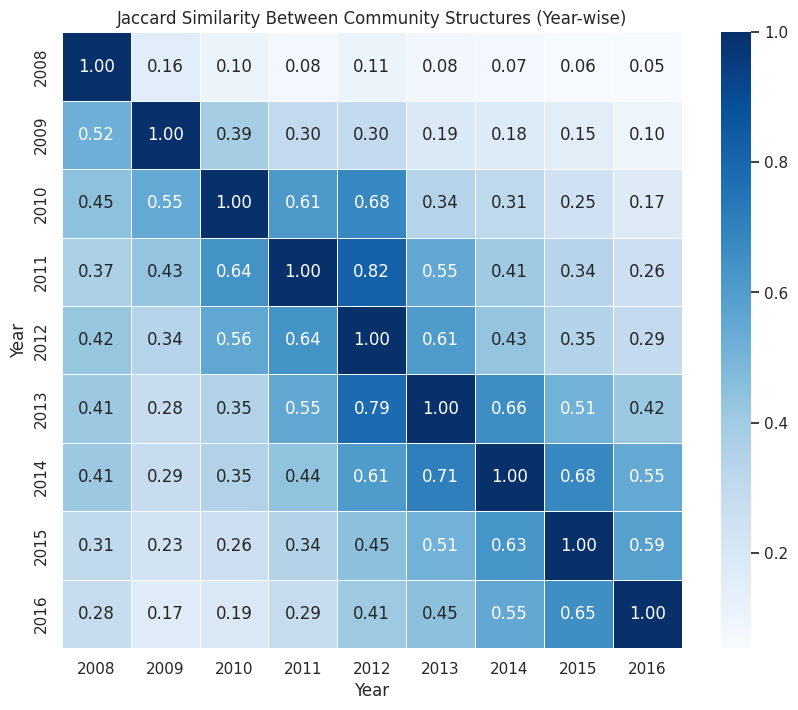

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

def compute_jaccard_matrix(community_data):
    years = sorted(community_data.keys())
    similarity_matrix = []

    for i in range(len(years)):
        row = []
        for j in range(len(years)):
            year_i = years[i]
            year_j = years[j]

            comms_i = community_data[year_i]["community_tags"]
            comms_j = community_data[year_j]["community_tags"]

            # Compute max similarity for each community in year_i with any in year_j
            similarities = []
            for comm_i in comms_i.values():
                max_sim = max(
                    jaccard_similarity(set(comm_i), set(comm_j))
                    for comm_j in comms_j.values()
                )
                similarities.append(max_sim)

            avg_sim = sum(similarities) / len(similarities) if similarities else 0
            row.append(round(avg_sim, 3))
        similarity_matrix.append(row)

    return pd.DataFrame(similarity_matrix, index=years, columns=years)

# Generate matrix
jaccard_df = compute_jaccard_matrix(community_data)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Jaccard Similarity Between Community Structures (Year-wise)")
plt.xlabel("Year")
plt.ylabel("Year")
plt.show()